# Projeto 3

In [35]:
import pandas as pd
import numpy as np
import re
import string
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [2]:
PETR4_raw = pd.read_excel (r'PETR4.SA .xltx')

GOLD_raw = pd.read_excel (r'Gold Futures Historical Data.xltx') 
RDS_raw = pd.read_excel (r'RDS-A.xltx') 
OIL_raw = pd.read_excel (r'Crude Oil WTI Futures Historical Data.xltx')
CRD_raw = pd.read_excel (r'USD_BRL Dados Históricos.xltx')

In [3]:
PETR4 = PETR4_raw[['Date', 'Adj Close']]

GOLD = GOLD_raw[['Date', 'Price']]
RDS = RDS_raw[['Date', 'Adj Close']]
OIL = OIL_raw[['Date', 'Price']]
CRD = CRD_raw[['Data', 'Último']]

Para PTR4:

In [4]:
PETR4_RE = PETR4.rename(columns={"Adj Close": "Valor_PETR4"})
PETR4_REDate = PETR4_RE.assign(Date = PETR4_RE.Date.values[::-1])
PETR4_F = PETR4_REDate.assign(Valor_PETR4 = PETR4_REDate.Valor_PETR4.values[::-1])

Para Gold:

In [5]:
GOLD_F = GOLD.rename(columns={"Price": "Valor_GOLD"})

Para RDS:

In [6]:
RDS_RE = RDS.rename(columns={"Adj Close": "Valor_RDS"})
RDS_REDate = RDS_RE.assign(Date = RDS_RE.Date.values[::-1])
RDS_F = RDS_REDate.assign(Valor_RDS = RDS_REDate.Valor_RDS.values[::-1])

Para OIL:

In [7]:
OIL_F = OIL.rename(columns={"Price": "Valor_OIL"})

Para CRD:

In [8]:
CRD_RE = CRD.rename(columns={"Data": "Date","Último": "Valor_CRD" })

NOVO_VALOR = []
for e in CRD_RE["Valor_CRD"]:
    NOVO_VALOR.append(e/10000)
CRD_RE['Valor_CRD'] = NOVO_VALOR

NOVA_DATA = []
for e in CRD_RE['Date']:
    Separado = e.split(".")
    Correto = Separado[2] + "-" + Separado[1] + "-" + Separado[0]
    NOVA_DATA.append(Correto)
CRD_RE['Date'] = NOVA_DATA 

CRD_F = CRD_RE

Selecionando intervalo a ser estudado e alterando o index:

In [9]:
PETR4_F["Date"] == "2014-11-10" #1240
PETR4_F["Date"] == "2019-10-31" #2
PETR4_DATE = PETR4_F.loc[2: 1240].set_index('Date')

GOLD_F["Date"] == "2014-11-10" #1321
GOLD_F["Date"] == "2019-10-31" #5
GOLD_DATE = GOLD_F.loc[5: 1321].set_index('Date')

RDS_F["Date"] == "2014-11-10" #1256
RDS_F["Date"] == "2019-10-31" #4
RDS_DATE = RDS_F.loc[4: 1256].set_index('Date')

OIL_F["Date"] == "2014-11-10" #1318
OIL_F["Date"] == "2019-10-31" #5
OIL_DATE = OIL_F.loc[5: 1318].set_index('Date')

CRD_F["Date"] == "2014-11-10" #1302
CRD_F["Date"] == "2019-10-31" #4
CRD_DATE = CRD_F.loc[4: 1302].set_index('Date')


In [10]:
U1 = GOLD_DATE.join(PETR4_DATE)
U2 = RDS_DATE.join(U1)
U3 = OIL_DATE.join(U2)
U4 = CRD_DATE.join(U3)
U5 = U4.interpolate()
DADOS = U5.sort_index(ascending=True, axis=0)


In [11]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append(DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append(DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append(DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append(DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append(DADOS["Valor_PETR4"][i] - DADOS["Valor_PETR4"][i-1])    
    i+=1 
    

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]

V1 = -min(FAZER1) + max(FAZER1)
FAZERV1 = []
for e in FAZER1:
     FAZERV1.append(abs(e/V1))
        
V2 = -min(FAZER2) + max(FAZER2)
FAZERV2 = []
for e in FAZER2:
     FAZERV2.append(abs(e/V2))

V3 = -min(FAZER3) + max(FAZER3)
FAZERV3 = []
for e in FAZER3:
     FAZERV3.append(abs(e/V3))
        
V4 = -min(FAZER4) + max(FAZER4)
FAZERV4 = []
for e in FAZER4:
     FAZERV4.append(abs(e/V4))

V5 = -min(FAZER5) + max(FAZER5)
FAZERV5 = []
for e in FAZER5:
     FAZERV5.append(abs(e/V5))


    
DADOS_OPT['CALC_GOLD'] = FAZERV1
DADOS_OPT['CALC_RDS'] = FAZERV2
DADOS_OPT['CALC_OIL'] = FAZERV3
DADOS_OPT['CALC_CRD'] = FAZERV4
DADOS_OPT['CALC_PETR4'] = FAZERV5

C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [12]:
DADOS_OPT

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
Date,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.10,13.256026,0.036893,0.042277,0.040940,0.009911,0.003420
2014-11-12,2.5665,77.18,50.531734,1250.40,13.360181,0.045631,0.134800,0.057619,0.018979,0.018809
2014-11-13,2.5889,74.21,50.179653,1251.40,12.877283,0.009709,0.050157,0.225171,0.047237,0.087205
2014-11-14,2.6018,75.82,50.891159,1275.60,12.498541,0.234951,0.101361,0.122062,0.027204,0.068396
2014-11-17,2.6081,75.64,50.795807,1273.70,11.930425,0.018447,0.013584,0.013647,0.013286,0.102594
2014-11-18,2.5825,74.61,51.367947,1285.50,11.788397,0.114563,0.081507,0.078089,0.053986,0.025648
2014-11-19,2.5720,74.58,51.294594,1283.40,12.100860,0.020388,0.010450,0.002274,0.022143,0.056427
2014-11-20,2.5731,75.58,52.079445,1278.90,12.820473,0.043689,0.111809,0.075815,0.002320,0.129953
2014-11-21,2.5153,76.51,52.666267,1285.90,13.540086,0.067961,0.083598,0.070508,0.121889,0.129953


##### 1º TESTE DE REGRESSÃO LINEAR

In [13]:
#Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [14]:
DADOS_OPT.columns

Index(['Valor_CRD', 'Valor_OIL', 'Valor_RDS', 'Valor_GOLD', 'Valor_PETR4',
       'CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4'],
      dtype='object')

In [15]:
#Variáveis do nosso dataset
df = DADOS_OPT[['Valor_CRD', 'Valor_OIL', 'Valor_RDS', 'Valor_GOLD', 'Valor_PETR4', 'CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD', 'CALC_PETR4']]

In [16]:
df.describe()

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,3.476241,53.151318,50.456716,1302.706052,15.464385,0.070372,0.070776,0.066847,0.056849,0.053867
std,0.392010,9.631621,9.139196,85.301049,6.710696,0.066617,0.064594,0.059065,0.053114,0.052421
min,2.501100,26.210000,28.818090,1090.500000,3.976808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.179500,46.700000,42.996601,1256.500000,9.809459,0.023301,0.023320,0.022745,0.018136,0.018809
50%,3.392600,52.410000,48.118477,1302.400000,14.155543,0.051456,0.052302,0.051554,0.044918,0.041038
75%,3.827200,59.520000,58.919838,1350.100000,20.366940,0.097087,0.097986,0.094011,0.078659,0.070247
max,4.207700,77.940000,68.253716,1560.400000,30.080000,0.573786,0.575746,0.610311,0.508646,0.546551


In [17]:
#Verificando os valores nulos
np.sum(df.isnull());

In [18]:
#Definindo nossa variável de resposta
Y = df['CALC_PETR4']

In [19]:
#Definindo os outros parâmtros. Valores brutos removidos; valores relativos mais relevantes na regressão
X = df[['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD']]
X

,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD
Date,,,,
2014-11-11,0.036893,0.042277,0.040940,0.009911
2014-11-12,0.045631,0.134800,0.057619,0.018979
2014-11-13,0.009709,0.050157,0.225171,0.047237
2014-11-14,0.234951,0.101361,0.122062,0.027204
2014-11-17,0.018447,0.013584,0.013647,0.013286
2014-11-18,0.114563,0.081507,0.078089,0.053986
2014-11-19,0.020388,0.010450,0.002274,0.022143
2014-11-20,0.043689,0.111809,0.075815,0.002320
2014-11-21,0.067961,0.083598,0.070508,0.121889


In [20]:
#Usando regressão para aplicar o ajuste
results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CALC_PETR4   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     27.04
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.42e-21
Time:                        15:00:38   Log-Likelihood:                 2036.4
No. Observations:                1297   AIC:                            -4063.
Df Residuals:                    1292   BIC:                            -4037.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0302      0.003     10.370      0.000       0.025       0.036
CALC_GOLD      0.0113      0.021      0.533      0.594      -0.030       0.053
CALC_RDS       0.1289      0.024      5.433      0.000       0.082       0.175
CALC_OIL       0.0666      0.026      2.571      0.010       0.016       0.117
CALC_CRD       0.1630      0.027      6.108      0.000       0.111       0.215
==============================================================================
Omnibus:                      788.386   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11088.636
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      16.370   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ajustando R-squared Para as Variáveis que Mais Influenciam o CALC_PETR4**

* Removendo variáveis com valor-p >10%

In [21]:
#Removendo Calc_GOLD
X1 = df[['CALC_RDS', 'CALC_OIL', 'CALC_CRD']]

In [22]:
#Usando regressão para aplicar o ajuste
results1 = regress(X1, Y)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CALC_PETR4   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     35.98
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.49e-22
Time:                        15:00:38   Log-Likelihood:                 2036.3
No. Observations:                1297   AIC:                            -4065.
Df Residuals:                    1293   BIC:                            -4044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0309      0.003     11.570      0.000       0.026       0.036
CALC_RDS       0.1292      0.024      5.451      0.000       0.083       0.176
CALC_OIL       0.0678      0.026      2.628      0.009       0.017       0.118
CALC_CRD       0.1642      0.027      6.175      0.000       0.112       0.216
==============================================================================
Omnibus:                      789.593   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11163.627
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      16.419   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PairPlot da Regressão**

In [60]:
i = 0
FAZER1 = []
while i < 1298:
    FAZER1.append(DADOS["Valor_GOLD"][i] - DADOS["Valor_GOLD"][i-1])    
    i+=1
    
i = 0
FAZER2 = []
while i < 1298:
    FAZER2.append(DADOS["Valor_RDS"][i] - DADOS["Valor_RDS"][i-1])    
    i+=1
    
i = 0
FAZER3 = []
while i < 1298:
    FAZER3.append(DADOS["Valor_OIL"][i] - DADOS["Valor_OIL"][i-1])    
    i+=1    

i = 0
FAZER4 = []
while i < 1298:
    FAZER4.append(DADOS["Valor_CRD"][i] - DADOS["Valor_CRD"][i-1])    
    i+=1     
    
i = 0
FAZER5 = []
while i < 1298:
    FAZER5.append(DADOS["Valor_PETR4"][i] - DADOS["Valor_PETR4"][i-1])    
    i+=1 

i = 0
FAZER6 = []
while i < 1298:
    if DADOS["Valor_PETR4"][i+1] - DADOS["Valor_PETR4"][i] >= 0:
        FAZER6.append("Up")
    
    else:
        FAZER6.append("DOWN")
    
    i+=1

DADOS_OPT = DADOS.iloc[1:1298,:]

del FAZER1[0]
del FAZER2[0]
del FAZER3[0]
del FAZER4[0]
del FAZER5[0]
del FAZER6[0]

V1 = -min(FAZER1) + max(FAZER1)
FAZERV1 = []
for e in FAZER1:
     FAZERV1.append(abs(e/V1))
        
V2 = -min(FAZER2) + max(FAZER2)
FAZERV2 = []
for e in FAZER2:
     FAZERV2.append(abs(e/V2))

V3 = -min(FAZER3) + max(FAZER3)
FAZERV3 = []
for e in FAZER3:
     FAZERV3.append(abs(e/V3))
        
V4 = -min(FAZER4) + max(FAZER4)
FAZERV4 = []
for e in FAZER4:
     FAZERV4.append(abs(e/V4))

V5 = -min(FAZER5) + max(FAZER5)
FAZERV5 = []
for e in FAZER5:
     FAZERV5.append(abs(e/V5))


    
DADOS_OPT['CALC_GOLD'] = FAZERV1
DADOS_OPT['CALC_RDS'] = FAZERV2
DADOS_OPT['CALC_OIL'] = FAZERV3
DADOS_OPT['CALC_CRD'] = FAZERV4
DADOS_OPT['CALC_PETR4'] = FAZERV5
DADOS_OPT['Position'] = FAZER6

C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jotah\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [61]:
DADOS_OPT

,Valor_CRD,Valor_OIL,Valor_RDS,Valor_GOLD,Valor_PETR4,CALC_GOLD,CALC_RDS,CALC_OIL,CALC_CRD,CALC_PETR4,Position
Date,,,,,,,,,,,
2014-11-11,2.5575,77.94,51.477970,1255.10,13.256026,0.036893,0.042277,0.040940,0.009911,0.003420,Up
2014-11-12,2.5665,77.18,50.531734,1250.40,13.360181,0.045631,0.134800,0.057619,0.018979,0.018809,DOWN
2014-11-13,2.5889,74.21,50.179653,1251.40,12.877283,0.009709,0.050157,0.225171,0.047237,0.087205,DOWN
2014-11-14,2.6018,75.82,50.891159,1275.60,12.498541,0.234951,0.101361,0.122062,0.027204,0.068396,DOWN
2014-11-17,2.6081,75.64,50.795807,1273.70,11.930425,0.018447,0.013584,0.013647,0.013286,0.102594,DOWN
2014-11-18,2.5825,74.61,51.367947,1285.50,11.788397,0.114563,0.081507,0.078089,0.053986,0.025648,Up
2014-11-19,2.5720,74.58,51.294594,1283.40,12.100860,0.020388,0.010450,0.002274,0.022143,0.056427,Up
2014-11-20,2.5731,75.58,52.079445,1278.90,12.820473,0.043689,0.111809,0.075815,0.002320,0.129953,Up
2014-11-21,2.5153,76.51,52.666267,1285.90,13.540086,0.067961,0.083598,0.070508,0.121889,0.129953,DOWN


In [62]:
x_vars = ['CALC_PETR4']

In [63]:
y_vars = ['CALC_GOLD', 'CALC_RDS', 'CALC_OIL', 'CALC_CRD']

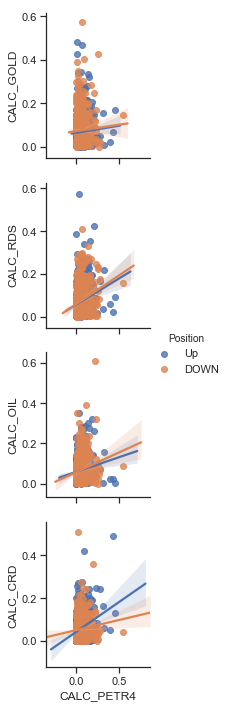

In [64]:
sns.pairplot(DADOS_OPT, hue='Position', kind="reg", x_vars=x_vars, y_vars=y_vars)